## About the dataset

This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

#### Data Dictionary
1. Elevation = Elevation in meters.
2. Aspect = Aspect in degrees azimuth.
3. Slope = Slope in degrees.
4. Horizontal_Distance_To_Hydrology = Horizontal distance to nearest surface water features.
5. Vertical_Distance_To_Hydrology = Vertical distance to nearest surface water features.
6. Horizontal_Distance_To_Roadways = Horizontal distance to nearest roadway.
7. Hillshade_9am = Hill shade index at 9am, summer solstice. Value out of 255.
8. Hillshade_Noon = Hill shade index at noon, summer solstice. Value out of 255.
9. Hillshade_3pm = Hill shade index at 3pm, summer solstice. Value out of 255.
10. Horizontal_Distance_To_Fire_Point = sHorizontal distance to nearest wildfire ignition points.
11. Wilderness_Area1 = Rawah Wilderness Area
12. Wilderness_Area2 = Neota Wilderness Area
13. Wilderness_Area3 = Comanche Peak Wilderness Area
14. Wilderness_Area4 = Cache la Poudre Wilderness Area
15. Soil_Type1-40
16. Cover_Type (target)
    * Spruce/Fir,
    * Lodgepole Pine,
    * Ponderosa Pine,
    * Cottonwood/Willow,
    * Aspen,
    * Douglas-fir,
    * Krummholz

In [6]:
! pip install numpy pandas

Defaulting to user installation because normal site-packages is not writeable


In [7]:

#Importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [1]:
df=pd.read_csv('covtype/covtype.csv')

NameError: name 'pd' is not defined

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


In [6]:
df.shape

(581012, 55)

In [7]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [8]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [10]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [12]:
df.duplicated().sum()

0

- Initial Observations

- There are 581012 rows and 55 features.
- No missing values in the dataset
- No duplicate rows
- There appear to be no outliers in the data.
- There is 55 numberical and non-null data and 0 categorical columns.

In [13]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [14]:
soil_df=df[['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']]

In [15]:
wilddf=df[['Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']]

In [16]:
features_df=df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']]

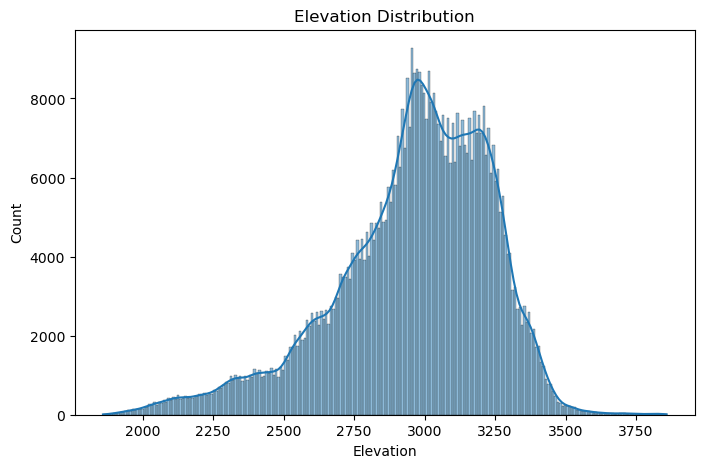

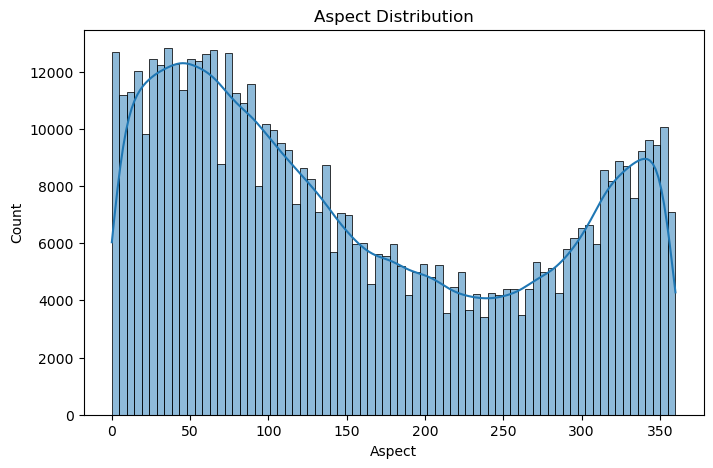

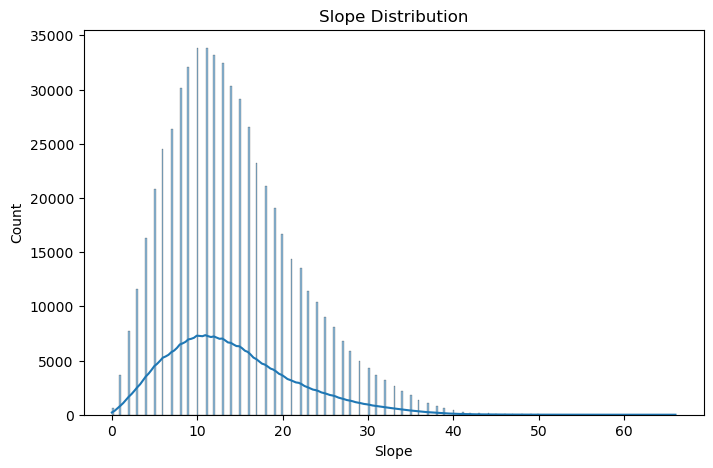

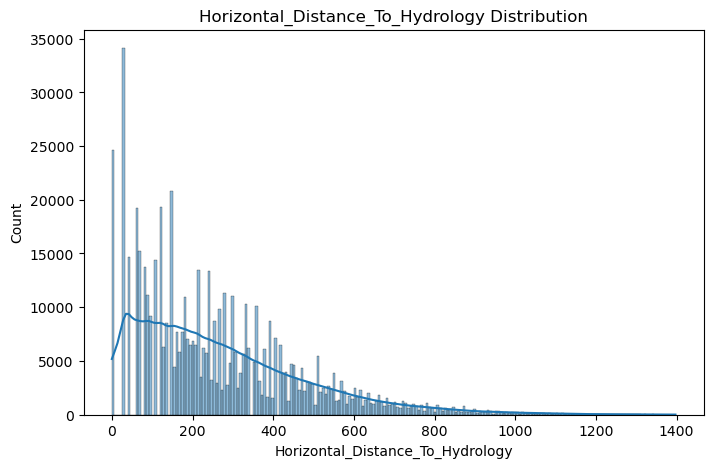

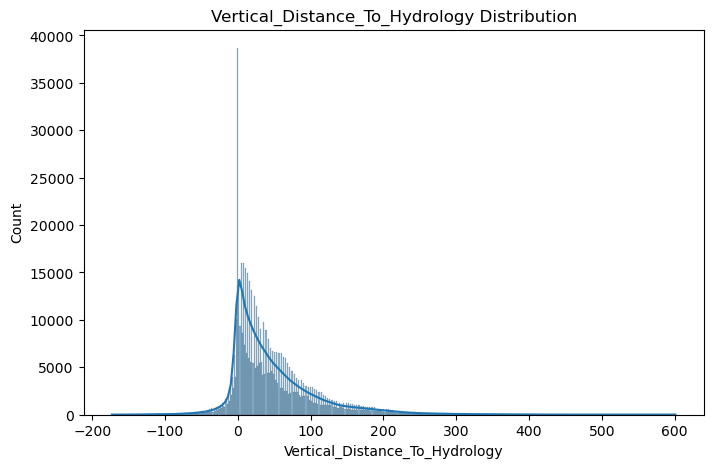

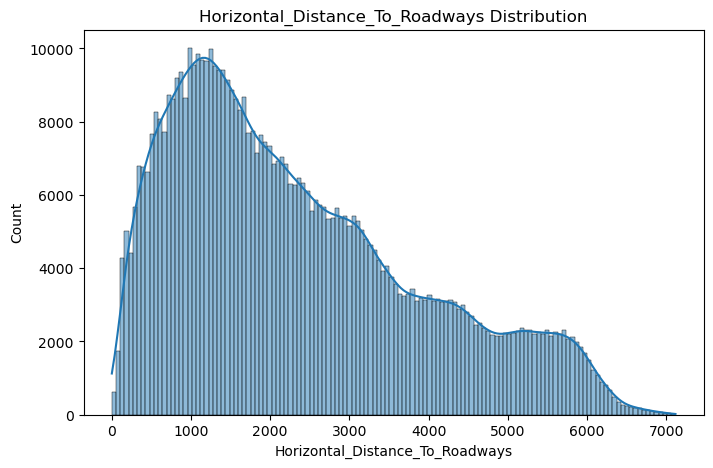

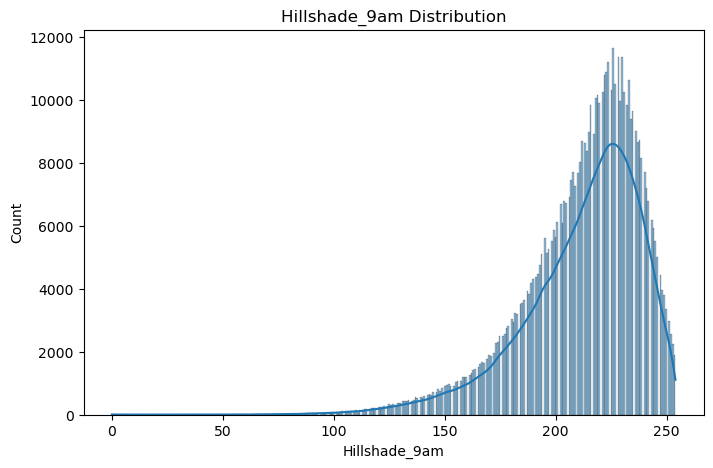

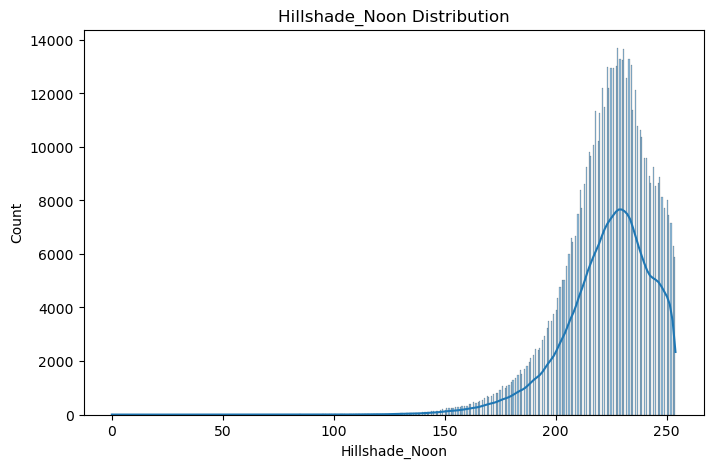

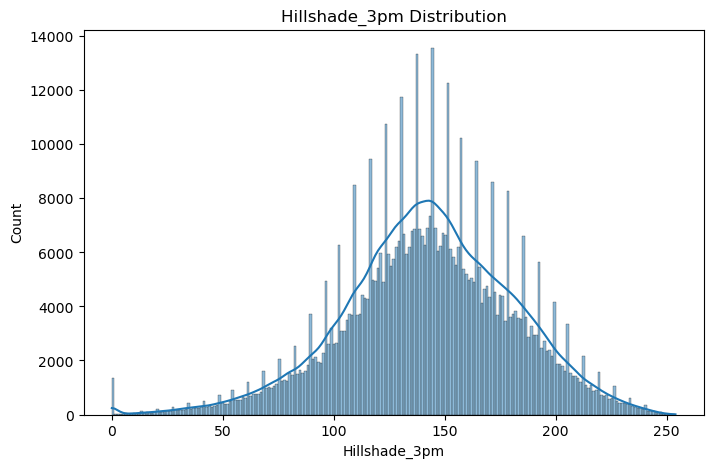

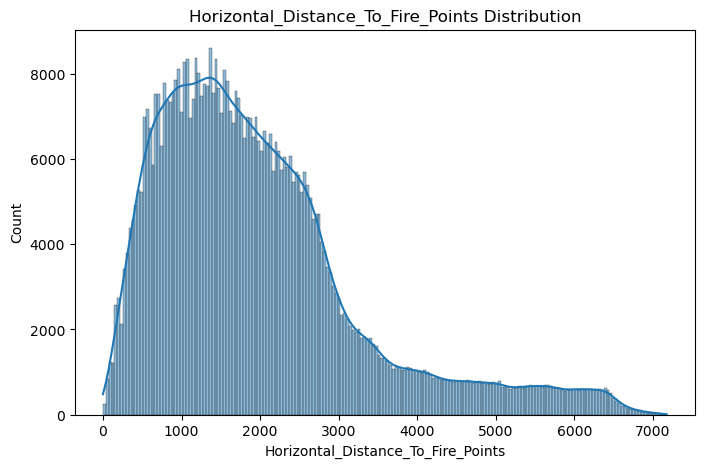

In [17]:
for column in features_df.columns:
    plt.figure(figsize=(8,5))
    sb.histplot(features_df[column], kde=True)
    plt.title(f'{column} Distribution')
    plt.show()

In [18]:
corr = round(df.corr(),4)

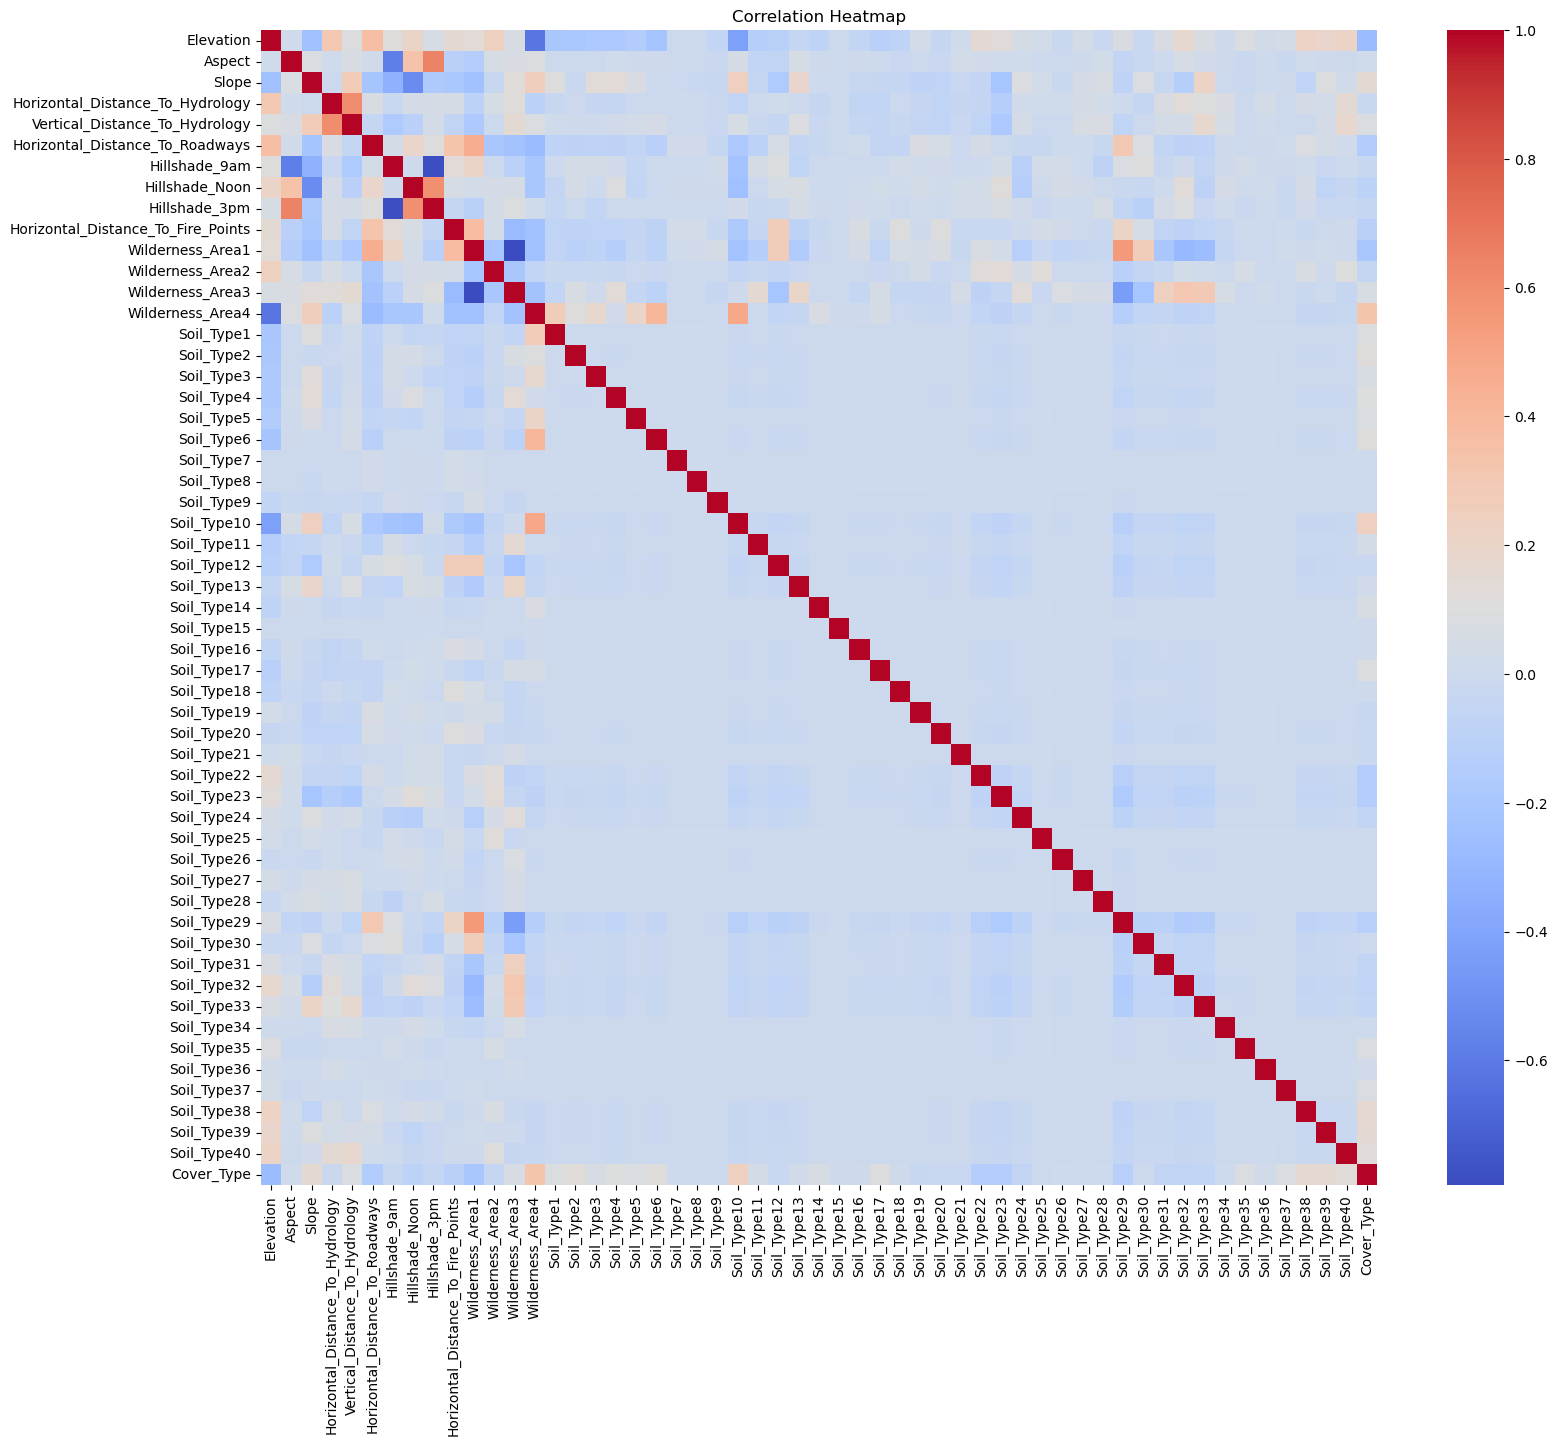

In [19]:
plt.figure(figsize=(18,15))
sb.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the heatmap, it can be inferred that only a handful of columns can be used to predict the `Cover_Type`, We can remove the rest of the columns while making predictions to decrease the complexity of our model.

**Feature Selection**

In [20]:
#Top 12 highly correlated variable to 'cover Type'
print(corr['Cover_Type'])

Elevation                            -0.2696
Aspect                                0.0171
Slope                                 0.1483
Horizontal_Distance_To_Hydrology     -0.0203
Vertical_Distance_To_Hydrology        0.0817
Horizontal_Distance_To_Roadways      -0.1534
Hillshade_9am                        -0.0354
Hillshade_Noon                       -0.0964
Hillshade_3pm                        -0.0483
Horizontal_Distance_To_Fire_Points   -0.1089
Wilderness_Area1                     -0.2039
Wilderness_Area2                     -0.0481
Wilderness_Area3                      0.0668
Wilderness_Area4                      0.3232
Soil_Type1                            0.0908
Soil_Type2                            0.1181
Soil_Type3                            0.0681
Soil_Type4                            0.0997
Soil_Type5                            0.0779
Soil_Type6                            0.1130
Soil_Type7                           -0.0005
Soil_Type8                           -0.0037
Soil_Type9

In [21]:
#Top 12 positively correlated to Cover_Type
print("-"*50)
print(corr['Cover_Type'].sort_values(ascending=False).head(12))
l1=corr['Cover_Type'].sort_values(ascending=False).head(12).index.to_list()

--------------------------------------------------
Cover_Type          1.0000
Wilderness_Area4    0.3232
Soil_Type10         0.2439
Soil_Type38         0.1602
Soil_Type39         0.1557
Slope               0.1483
Soil_Type40         0.1284
Soil_Type2          0.1181
Soil_Type6          0.1130
Soil_Type4          0.0997
Soil_Type1          0.0908
Soil_Type17         0.0906
Name: Cover_Type, dtype: float64


In [22]:
#Top 12 negatively correlated to Cover_Type
print(corr['Cover_Type'].sort_values(ascending=True).head(12))
l2=corr['Cover_Type'].sort_values(ascending=True).head(12).index.to_list()
print('-'*50)
print(l2)

Elevation                            -0.2696
Wilderness_Area1                     -0.2039
Horizontal_Distance_To_Roadways      -0.1534
Soil_Type22                          -0.1417
Soil_Type23                          -0.1351
Soil_Type29                          -0.1249
Horizontal_Distance_To_Fire_Points   -0.1089
Hillshade_Noon                       -0.0964
Soil_Type32                          -0.0756
Soil_Type24                          -0.0687
Soil_Type31                          -0.0653
Soil_Type33                          -0.0625
Name: Cover_Type, dtype: float64
--------------------------------------------------
['Elevation', 'Wilderness_Area1', 'Horizontal_Distance_To_Roadways', 'Soil_Type22', 'Soil_Type23', 'Soil_Type29', 'Horizontal_Distance_To_Fire_Points', 'Hillshade_Noon', 'Soil_Type32', 'Soil_Type24', 'Soil_Type31', 'Soil_Type33']


In [23]:
high_corr_df=df[l1+l2]
high_corr_df

,Cover_Type,Wilderness_Area4,Soil_Type10,Soil_Type38,Soil_Type39,Slope,Soil_Type40,Soil_Type2,Soil_Type6,Soil_Type4,...,Horizontal_Distance_To_Roadways,Soil_Type22,Soil_Type23,Soil_Type29,Horizontal_Distance_To_Fire_Points,Hillshade_Noon,Soil_Type32,Soil_Type24,Soil_Type31,Soil_Type33
0,5,0,0,0,0,3,0,0,0,0,...,510,0,0,1,6279,232,0,0,0,0
1,5,0,0,0,0,2,0,0,0,0,...,390,0,0,1,6225,235,0,0,0,0
2,2,0,0,0,0,9,0,0,0,0,...,3180,0,0,0,6121,238,0,0,0,0
3,2,0,0,0,0,18,0,0,0,0,...,3090,0,0,0,6211,238,0,0,0,0
4,5,0,0,0,0,2,0,0,0,0,...,391,0,0,1,6172,234,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,3,0,0,0,0,20,0,1,0,0,...,108,0,0,0,837,237,0,0,0,0
581008,3,0,0,0,0,19,0,1,0,0,...,95,0,0,0,845,237,0,0,0,0
581009,3,0,0,0,0,17,0,1,0,0,...,90,0,0,0,854,241,0,0,0,0
581010,3,0,0,0,0,15,0,1,0,0,...,90,0,0,0,864,245,0,0,0,0


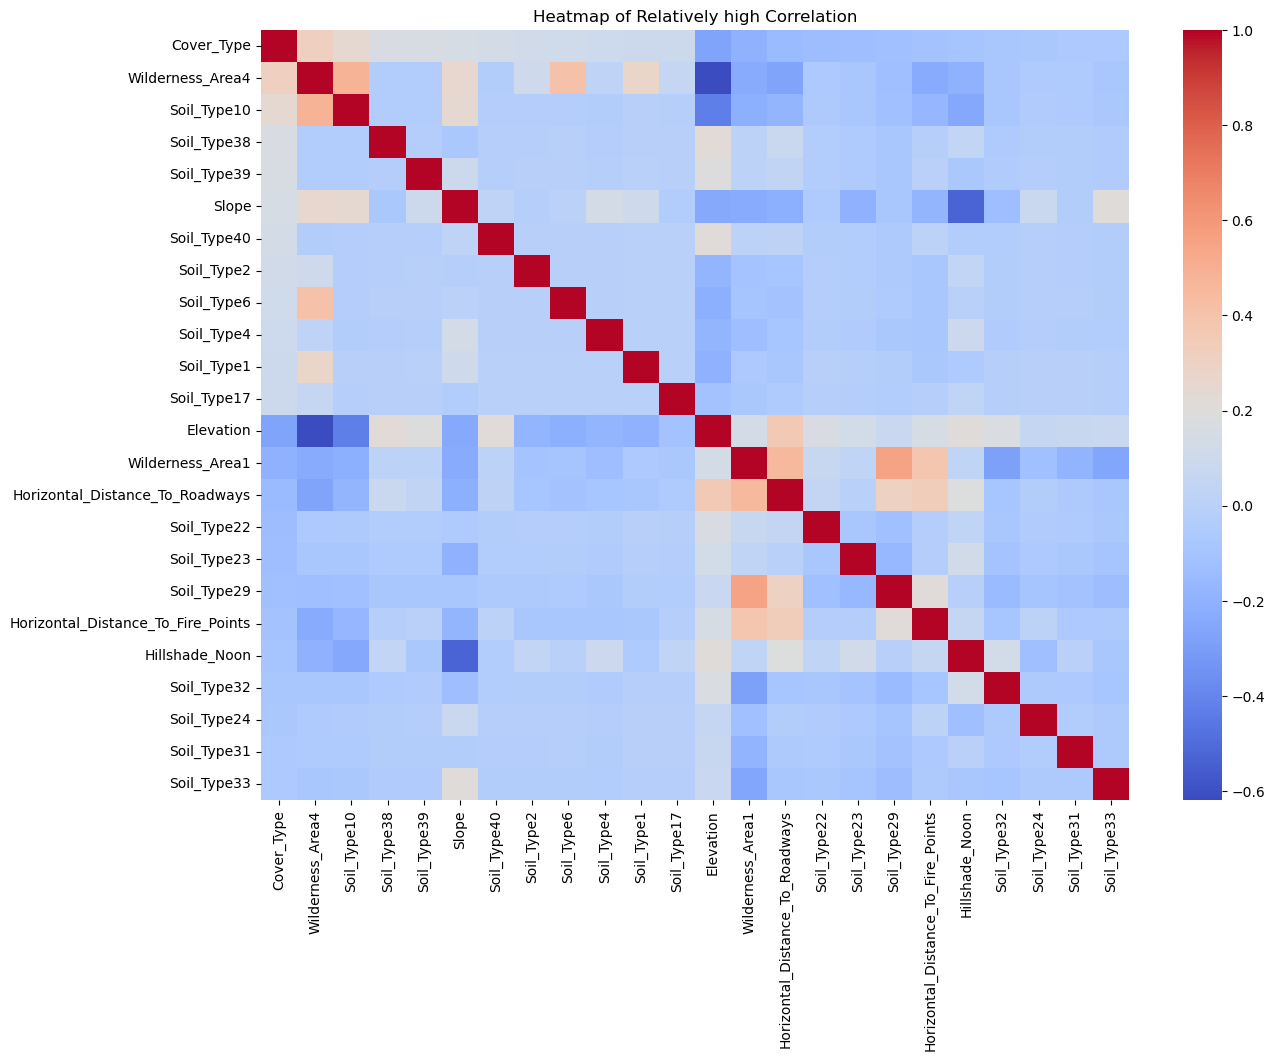

In [24]:
corr2 = round(high_corr_df.corr(),3)
plt.figure(figsize=(14,10))
sb.heatmap(corr2, annot=False, cmap='coolwarm')
plt.title('Heatmap of Relatively high Correlation')
plt.show()

Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

X = high_corr_df.drop(columns='Cover_Type') #all the features except target variable(Independent variable)
Y = high_corr_df['Cover_Type']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(406708, 23)
(174304, 23)
(406708,)
(174304,)


Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

Building a Base Model (Decision Tree)

In [28]:
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(random_state=42, max_depth=7)
# seting max depth to 7 to prevent overfitting
base_model.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [29]:
base_model_prediction = base_model.predict(X_test_scaled)
base_model_prediction

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

acc = accuracy_score(Y_test, base_model_prediction)
cr = classification_report(Y_test, base_model_prediction)
cm = confusion_matrix(Y_test, base_model_prediction)


print('Testing Accuracy: ',acc)
print('Classification Report :- \n', cr)
print('Confusion Matrix: \n', cm)

Testing Accuracy:  0.7312339361116211
Classification Report :- 
               precision    recall  f1-score   support

           1       0.73      0.69      0.71     63556
           2       0.74      0.82      0.78     85078
           3       0.71      0.79      0.75     10638
           4       0.46      0.48      0.47       795
           5       0.66      0.06      0.10      2941
           6       0.53      0.25      0.34      5227
           7       0.73      0.60      0.66      6069

    accuracy                           0.73    174304
   macro avg       0.65      0.53      0.54    174304
weighted avg       0.73      0.73      0.72    174304

Confusion Matrix: 
 [[43741 18573    27     0    12     0  1203]
 [13926 69803   742     0    73   422   112]
 [    0  1221  8407   278     2   730     0]
 [    0     1   366   385     0    43     0]
 [   17  2711    47     0   166     0     0]
 [    0  1386  2334   175     0  1332     0]
 [ 2412    34     0     0     0     0  3623]]


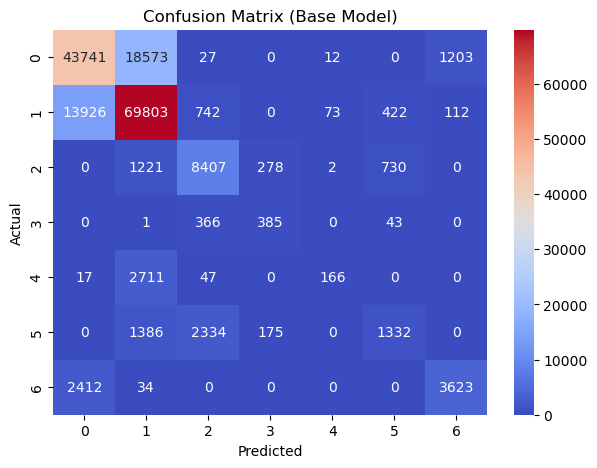

In [31]:
plt.figure(figsize=(7,5))
sb.heatmap(cm,annot=True, cmap='coolwarm', fmt='g')
plt.title('Confusion Matrix (Base Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

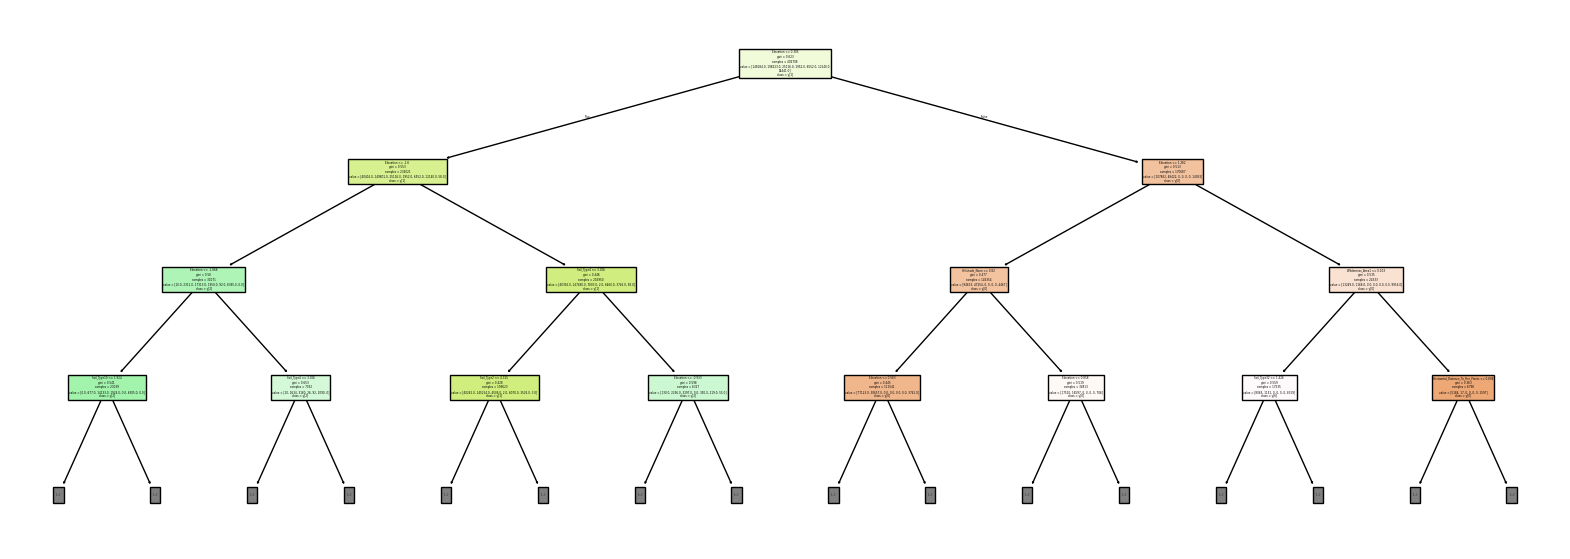

In [32]:
# visualizing the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,7))
plot_tree(base_model, max_depth=3, filled=True, class_names=True, feature_names=X.columns)
plt.show()

In [33]:
# putting the features and their importance in a Dataframe
base_model_features=base_model.feature_importances_
base_model_features_df=pd.DataFrame({'Feature':X.columns, 'Importance': base_model_features}).sort_values(by='Importance', ascending=False)

In [34]:
base_model_features_df

,Feature,Importance
11,Elevation,0.716387
13,Horizontal_Distance_To_Roadways,0.059748
17,Horizontal_Distance_To_Fire_Points,0.043264
8,Soil_Type4,0.030280
12,Wilderness_Area1,0.028109
6,Soil_Type2,0.024254
18,Hillshade_Noon,0.022629
19,Soil_Type32,0.016111
14,Soil_Type22,0.015714
15,Soil_Type23,0.015378


Observation :-
- clearly shows that feature(Elevation) is highly influencing the target variable.

C:\Users\GOKUL RAJ\AppData\Local\Temp\ipykernel_20492\1474273810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(base_model_features_df.head(10), x='Importance', y='Feature', palette='coolwarm')


Text(0.5, 1.0, 'Top 10 Important Features (Base Model)')

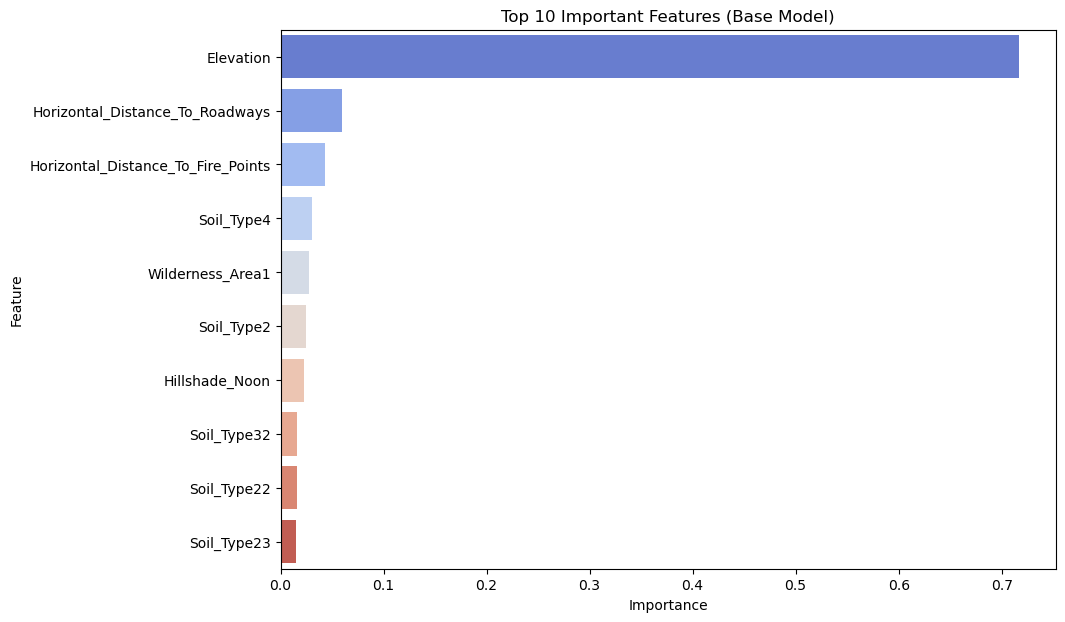

In [35]:
plt.figure(figsize=(10,7))
sb.barplot(base_model_features_df.head(10), x='Importance', y='Feature', palette='coolwarm')
plt.title('Top 10 Important Features (Base Model)')
#plt.show()

### Base Model Observations:
- The model has a testing accuracy of 73%
- The model is dominated by the Elevation feature
- Most likely underfitting the data

### Builing a Better model using GridSearchCV

In [36]:
from sklearn.model_selection import  GridSearchCV, StratifiedKFold

dtc = DecisionTreeClassifier(random_state=42)

params = {
    'criterion':['gini', 'entropy'],
    'max_depth': range(5,30)
}

# for optimal no of splits
stratified_kfold = StratifiedKFold(n_splits=3,shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=dtc, param_grid=params, scoring='accuracy', cv=stratified_kfold, verbose=3, return_train_score=True)
grid_search.fit(X_train_scaled, Y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END criterion=gini, max_depth=5;, score=(train=0.708, test=0.706) total time=   0.8s
[CV 2/3] END criterion=gini, max_depth=5;, score=(train=0.701, test=0.702) total time=   0.9s
[CV 3/3] END criterion=gini, max_depth=5;, score=(train=0.704, test=0.702) total time=   0.9s
[CV 1/3] END criterion=gini, max_depth=6;, score=(train=0.727, test=0.723) total time=   0.9s
[CV 2/3] END criterion=gini, max_depth=6;, score=(train=0.720, test=0.721) total time=   0.9s
[CV 3/3] END criterion=gini, max_depth=6;, score=(train=0.724, test=0.722) total time=   1.0s
[CV 1/3] END criterion=gini, max_depth=7;, score=(train=0.736, test=0.733) total time=   1.0s
[CV 2/3] END criterion=gini, max_depth=7;, score=(train=0.731, test=0.730) total time=   1.0s
[CV 3/3] END criterion=gini, max_depth=7;, score=(train=0.734, test=0.732) total time=   1.0s
[CV 1/3] END criterion=gini, max_depth=8;, score=(train=0.748, test=0.743) total time=   1.1

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 30)},
             return_train_score=True, scoring='accuracy', verbose=3)

In [37]:
print('Best Score: ', grid_search.best_score_)
print('Best Parameters: ', grid_search.best_params_)
print('Best Estimator: ', grid_search.best_estimator_)

Best Score:  0.9143390374572674
Best Parameters:  {'criterion': 'entropy', 'max_depth': 29}
Best Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=29, random_state=42)


According to GridSearchCV results, `max_depth` of 29 is the best.

But at that point, the model is overfitting.

Let's visualize the `max_depth` to find the optimal value

Function to visualize max_depth values

In [39]:
def find_optimal_max_depth(maxdepth):
    training_acc = []
    testing_acc = []
    
    for i in range(1, maxdepth+1):
        dtc = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth=i)
        dtc.fit(X_train_scaled,Y_train)
        
        train_pred = dtc.predict(X_train_scaled)
        test_pred = dtc.predict(X_test_scaled)
        
        train_acc = accuracy_score(Y_train, train_pred)
        test_acc = accuracy_score(Y_test, test_pred)
        
        training_acc.append(train_acc)
        testing_acc.append(test_acc)
    
    return training_acc, testing_acc
        
        

In [57]:
optimal_max_depth = find_optimal_max_depth(30)

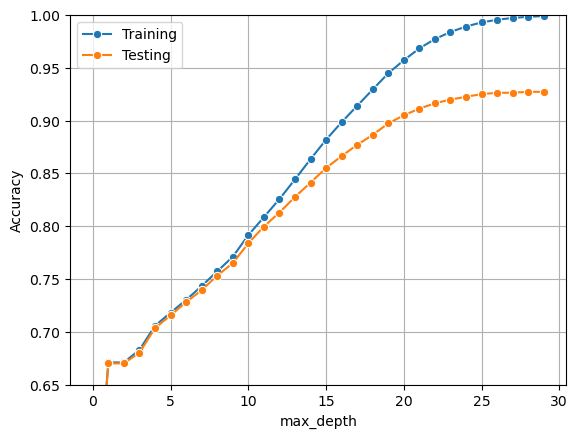

In [58]:
sb.lineplot(optimal_max_depth[0], label = 'Training', marker ='o')
sb.lineplot(optimal_max_depth[1], label = 'Testing', marker ='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim(0.65,1)
plt.grid()

According to the graph, the difference between the accuracy starts increasing after `max_depth`=10, but it still learns.

At `max_depth`=25, the model stops learning, and starts overfitting.

In [44]:
optimal_model = DecisionTreeClassifier(random_state=42, max_depth=25)
optimal_model.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(max_depth=25, random_state=42)

In [45]:
optimal_model_pred = optimal_model.predict(X_test_scaled)
optimal_model_train_pred=optimal_model.predict(X_train_scaled)

In [52]:


# Save the trained model
joblib.dump(optimal_model, 'decision_tree_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [46]:
train_acc=accuracy_score(Y_train, optimal_model_train_pred)
test_acc = accuracy_score(Y_test, optimal_model_pred)
cr2 = classification_report(Y_test, optimal_model_pred)
cm2 = confusion_matrix(Y_test, optimal_model_pred)

print('Training Accuracy:', train_acc)
print('Testing Accuracy:', test_acc)
print('Classification Report:\n', cr2)
print('Confusion Matrix:\n', cm2)

Training Accuracy: 0.9821739429762877
Testing Accuracy: 0.9149646594455664
Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.91      0.92     63556
           2       0.92      0.93      0.93     85078
           3       0.90      0.89      0.90     10638
           4       0.71      0.75      0.73       795
           5       0.81      0.71      0.75      2941
           6       0.83      0.81      0.82      5227
           7       0.93      0.93      0.93      6069

    accuracy                           0.91    174304
   macro avg       0.86      0.85      0.85    174304
weighted avg       0.91      0.91      0.91    174304

Confusion Matrix:
 [[57862  5250     8     0    76     8   352]
 [ 4587 79534   284     1   371   237    64]
 [    4   348  9503   164    40   579     0]
 [    0     1   148   594     0    52     0]
 [   80   714    44     0  2088    15     0]
 [   10   321   552    76    18  4250     0]
 [  368    50  

Text(58.222222222222214, 0.5, 'Actual')

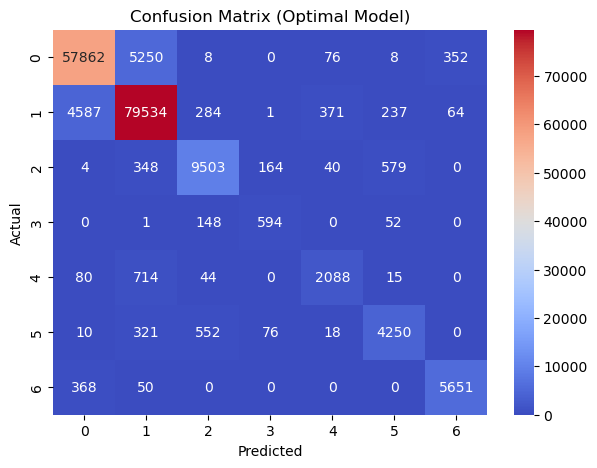

In [47]:
plt.figure(figsize=(7,5))
sb.heatmap(cm2,annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix (Optimal Model)')
plt.xlabel("Predicted")
plt.ylabel("Actual")



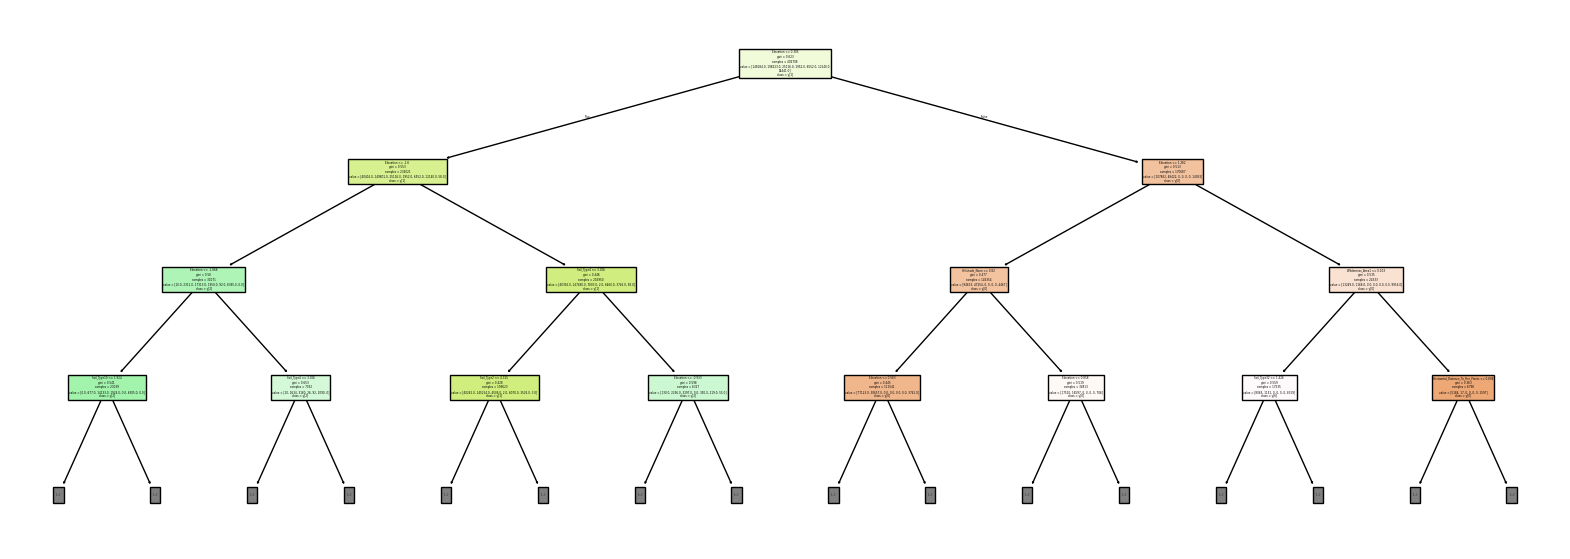

In [48]:
# Visualizing the Decision Tree 
from sklearn.tree import plot_tree

plt.figure(figsize=(20,7))
plot_tree(optimal_model, max_depth=3, filled=True, class_names=True, feature_names=X.columns)
plt.show()

In [49]:
optimal_model_features = optimal_model.feature_importances_
optimal_model_features_df = pd.DataFrame({'Feature': X.columns, 'Importance': optimal_model_features}).sort_values(by='Importance', ascending=False)

In [50]:
optimal_model_features_df

,Feature,Importance
11,Elevation,0.369821
13,Horizontal_Distance_To_Roadways,0.193803
17,Horizontal_Distance_To_Fire_Points,0.193429
18,Hillshade_Noon,0.063690
4,Slope,0.047975
12,Wilderness_Area1,0.019680
15,Soil_Type23,0.014787
8,Soil_Type4,0.012732
19,Soil_Type32,0.011478
6,Soil_Type2,0.010788


Text(0.5, 1.0, 'Top 10 Important Features (Optimal Model)')

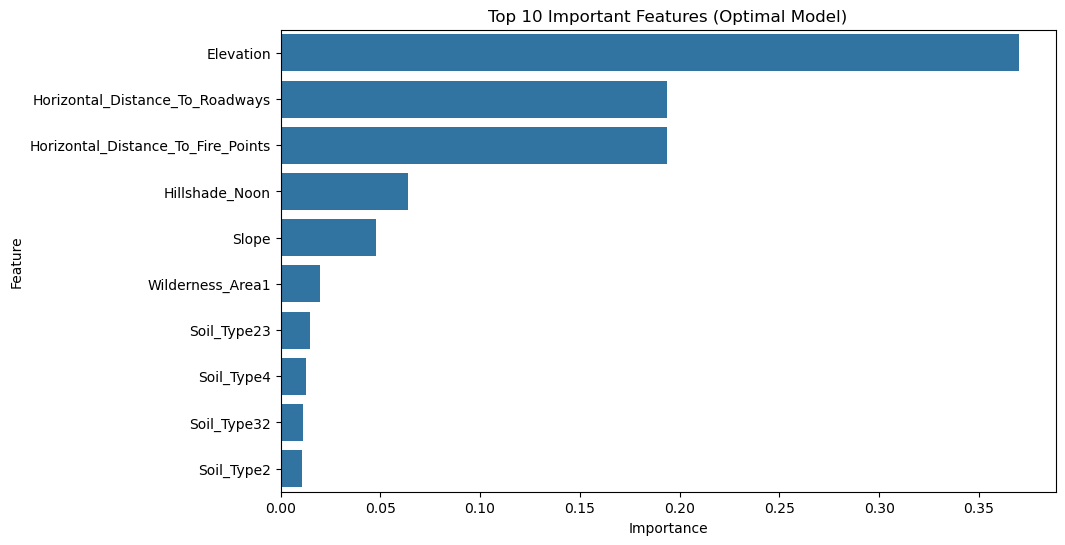

In [51]:
plt.figure(figsize=(10,6))
sb.barplot(optimal_model_features_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features (Optimal Model)')

### Optimal Model Observations

- The optimal model has a Testing Accuracy of 91.24%
- It also prioritizes the Elevation feature, but not as much as the base model
- GridSearchCV helped in optimizing the Decision Tee